In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings       
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')


# Importing the dataset

In [96]:
df = pd.read_excel("Superstore.xls")
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [97]:
df.shape

(9994, 21)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# indexing time series data

Setting order date as index

In [99]:
df = df.set_index(['Order Date'])
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# visualising the store sale

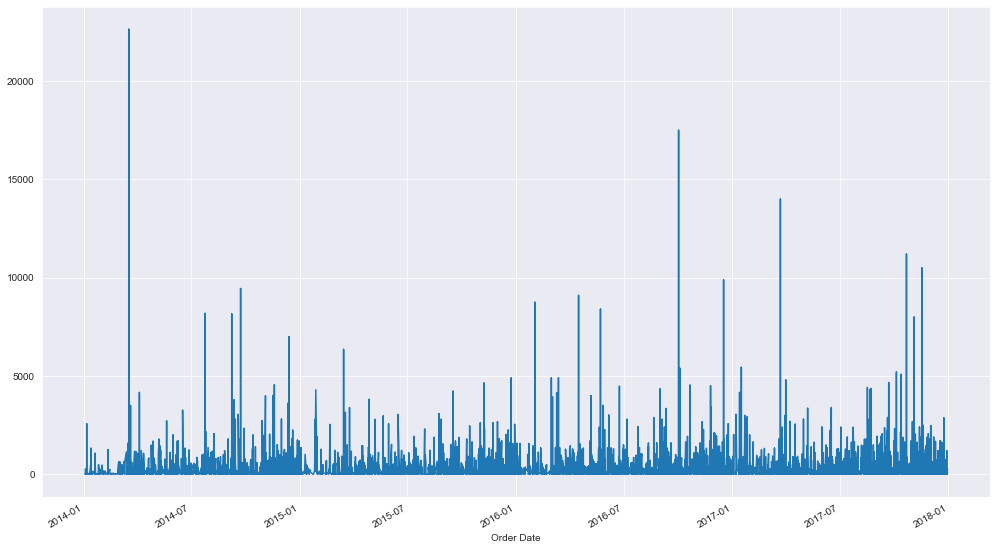

In [100]:
from pylab import rcParams
rcParams['figure.figsize'] = 17, 10
df['Sales'].plot();

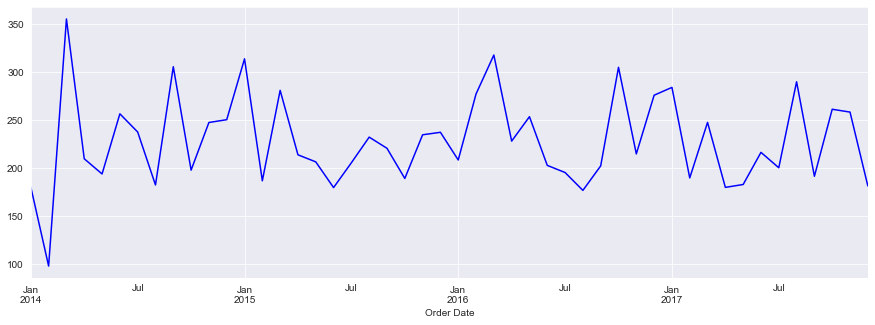

In [101]:
mean_monthlysales = df.resample(rule='MS').mean()['Sales']
#print(mean_monthlysales)
mean_monthlysales.plot(figsize=(15,5),c='blue')
plt.show()

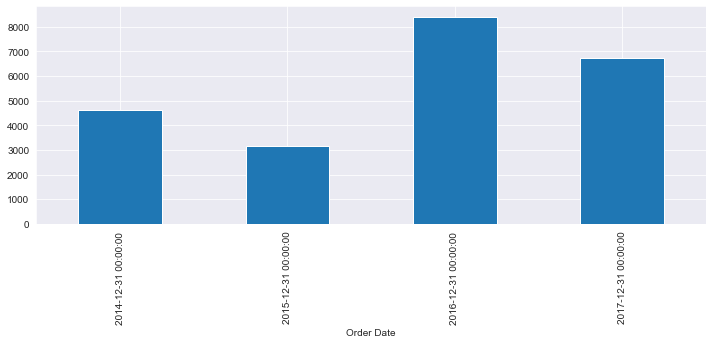

In [102]:
df.resample(rule='A').max()['Profit'].plot(kind='bar', figsize = (12,4))
plt.show()

# data Pre-Processing 


In [103]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [104]:
df.isna().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [105]:
col = ['Row ID','Country','Customer Name','Product Name','Order ID','Customer ID','Sub-Category','Ship Date','Ship Mode','Segment','City','State','Postal Code','Region','Product ID','Quantity','Discount','Profit']
df.drop(col,axis=1, inplace=True)

In [106]:
df.shape

(9994, 2)

In [107]:
df.head()

,Category,Sales
Order Date,,
2016-11-08,Furniture,261.9600
2016-11-08,Furniture,731.9400
2016-06-12,Office Supplies,14.6200
2015-10-11,Furniture,957.5775
2015-10-11,Office Supplies,22.3680


## furniture

In [108]:
furniture_data = df.loc[df['Category'] == 'Furniture']
furniture_data  = furniture_data.drop(['Category'],axis=1)
furniture_data.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840


In [109]:
y_furniture = furniture_data['Sales'].resample('MS').mean()
y_furniture.head()

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
Freq: MS, Name: Sales, dtype: float64

In [110]:
furniture_data = pd.DataFrame({'Order Date': y_furniture.index,
                          'Sales': y_furniture.values})

In [111]:
furniture_data.head()

,Order Date,Sales
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [112]:
furniture_df = furniture_data.sort_values('Order Date')
furniture_df = furniture_df.groupby('Order Date')['Sales'].sum().reset_index().set_index('Order Date') 
furniture_df.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792


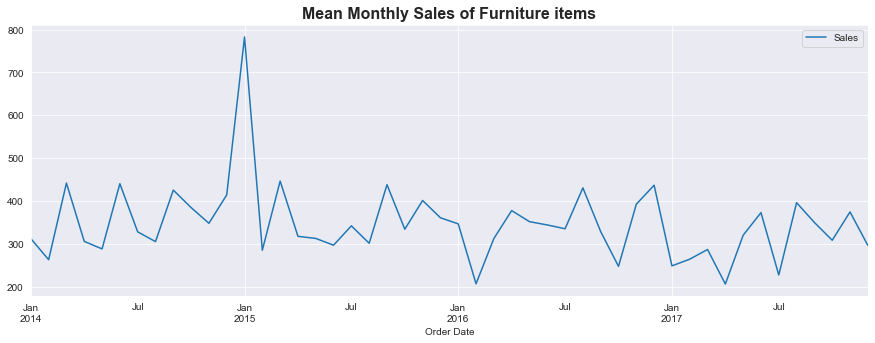

In [113]:
furniture_df.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Furniture items', fontsize=16, fontweight='bold')
plt.show()

## Office Supplies

In [114]:
office_supplies_data = df.loc[df['Category'] == 'Office Supplies']
office_supplies_data.drop('Category',axis=1, inplace=True)
office_supplies_data.head()

,Sales
Order Date,
2016-06-12,14.620
2015-10-11,22.368
2014-06-09,7.280
2014-06-09,18.504
2014-06-09,114.900


In [115]:
y_office = office_supplies_data['Sales'].resample('MS').mean()
y_office.head()

Order Date
2014-01-01     97.021600
2014-02-01     34.571742
2014-03-01     84.371363
2014-04-01    134.398482
2014-05-01    100.501746
Freq: MS, Name: Sales, dtype: float64

In [116]:
office_supplies_data = pd.DataFrame({'Order Date': y_office.index,'Sales':y_furniture.values})
office_supplies_data.head()

,Order Date,Sales
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [117]:
office_supplies_df  = office_supplies_data.sort_values('Order Date')
office_supplies_df = office_supplies_df.groupby('Order Date')['Sales'].sum().reset_index().set_index('Order Date') 
office_supplies_df.head()

,Sales
Order Date,
2014-01-01,312.126250
2014-02-01,262.808286
2014-03-01,441.635030
2014-04-01,305.570654
2014-05-01,288.032792


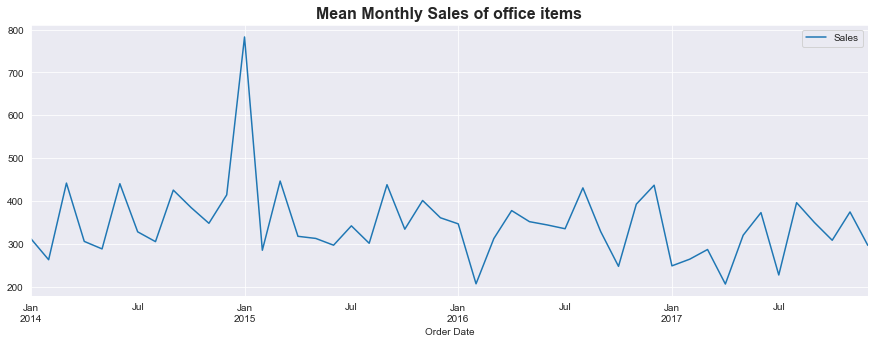

In [118]:
office_supplies_df.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of office items', fontsize=16, fontweight='bold')
plt.show()

## technology items 

In [119]:
technology_data = df.loc[df['Category'] == 'Technology']
technology_data.drop('Category',axis=1, inplace=True)
technology_data.head()

,Sales
Order Date,
2014-06-09,907.152
2014-06-09,911.424
2014-08-27,213.480
2016-01-16,90.570
2016-12-08,1097.544


In [120]:
y_technology = technology_data['Sales'].resample('MS').mean()
y_technology.head()

Order Date
2014-01-01     349.254444
2014-02-01     201.063750
2014-03-01    1477.780636
2014-04-01     353.670538
2014-05-01     355.550963
Freq: MS, Name: Sales, dtype: float64

In [121]:
technology_data = pd.DataFrame({'Order Date': y_technology.index,
                          'Sales': y_technology.values})
technology_data.head()

,Order Date,Sales
0,2014-01-01,349.254444
1,2014-02-01,201.063750
2,2014-03-01,1477.780636
3,2014-04-01,353.670538
4,2014-05-01,355.550963


In [122]:
technology_df = technology_data.sort_values('Order Date')
technology_df = technology_df.groupby('Order Date')['Sales'].sum().reset_index().set_index('Order Date') 
technology_df.head()

,Sales
Order Date,
2014-01-01,349.254444
2014-02-01,201.063750
2014-03-01,1477.780636
2014-04-01,353.670538
2014-05-01,355.550963


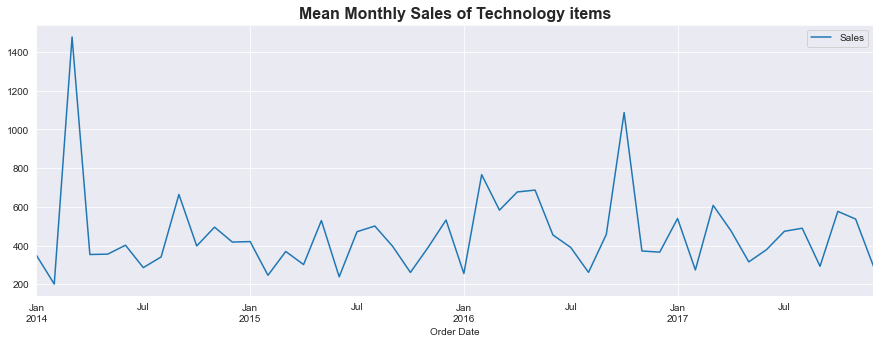

In [123]:
technology_df.plot(figsize = (15,5))
plt.title('Mean Monthly Sales of Technology items', fontsize=16, fontweight='bold')
plt.show()

## comparing the three categories

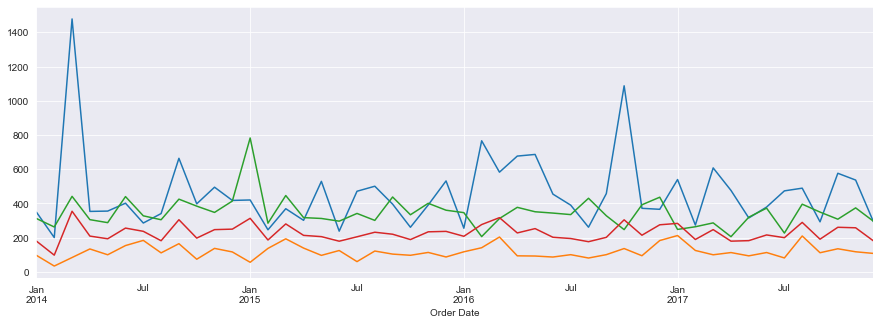

In [124]:
y_technology.plot(figsize = (15,5))
y_office.plot(figsize = (15,5))
y_furniture.plot(figsize = (15,5))
mean_monthlysales.plot(figsize=(15,5))
plt.show()

# Seasonal visualisation off each category

In [125]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## furniture

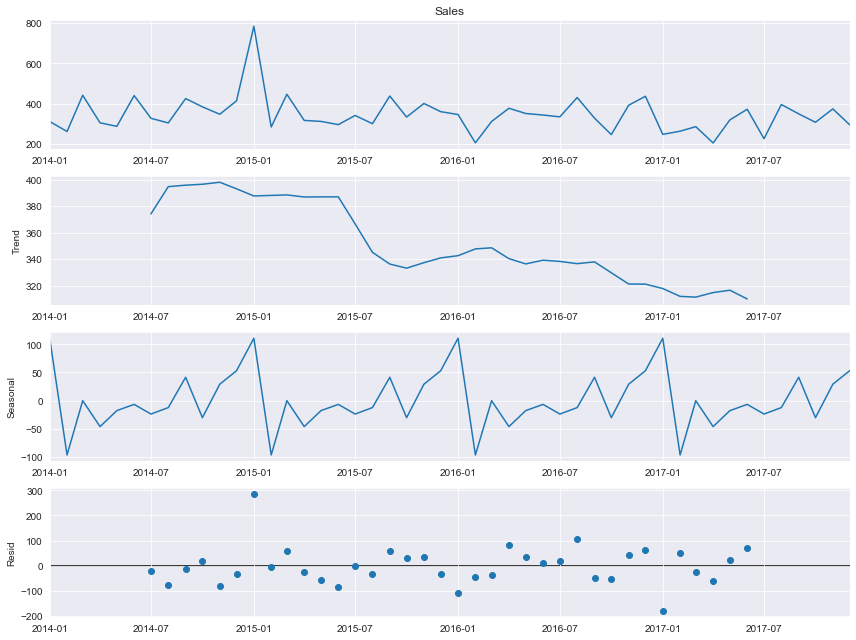

In [126]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_furniture, model='additive')
fig = decomposition.plot()
plt.show()

## office item

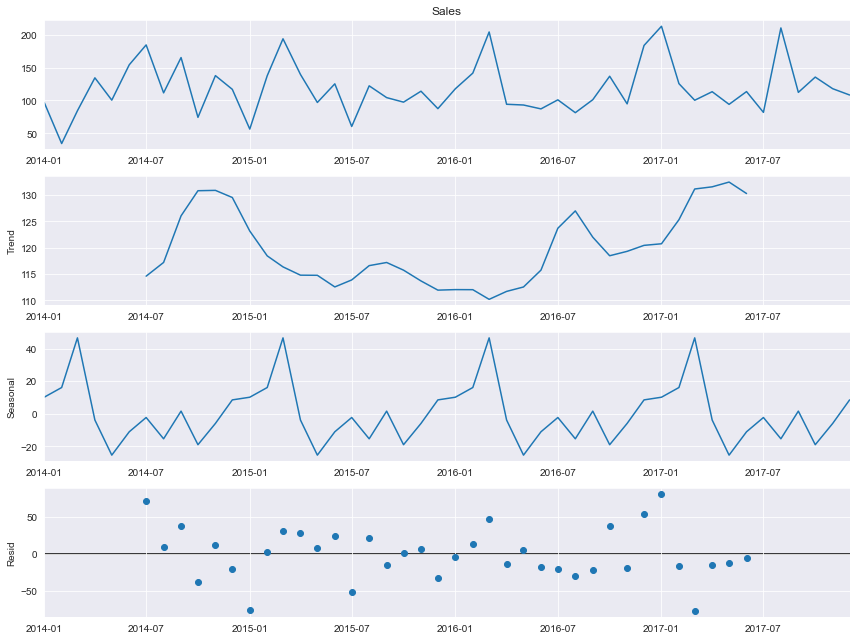

In [127]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_office, model='additive')
fig = decomposition.plot()
plt.show()

## Technology

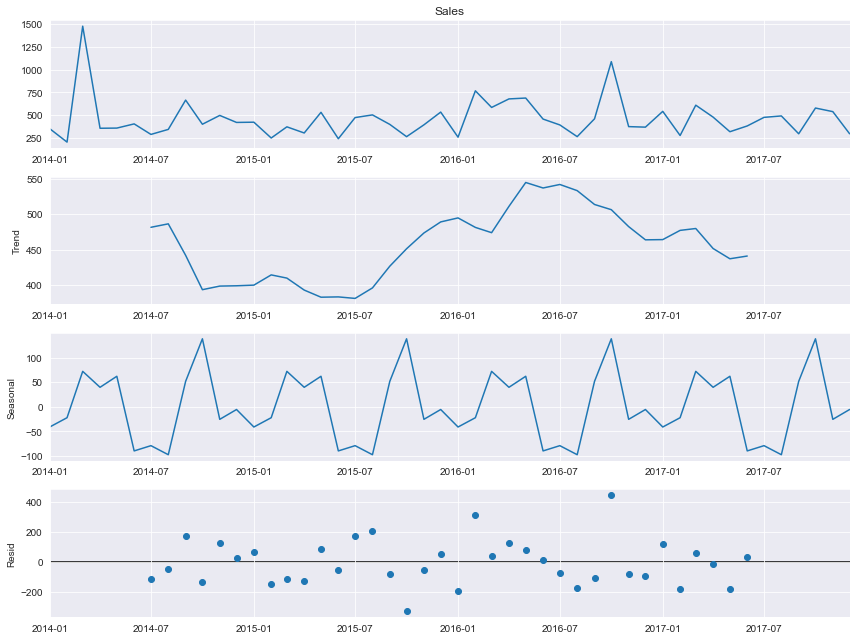

In [128]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9
decomposition = sm.tsa.seasonal_decompose(y_technology, model='additive')
fig = decomposition.plot()
plt.show()

# checking if data is stationary or not

In [129]:
from statsmodels.tsa.stattools import adfuller

In [130]:
def ADF(series):
    result = adfuller(series)
    print("p-value = ",result[1])    
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [131]:
ADF(y_furniture)

p-value =  9.093398510006677e-10
Data is stationary


In [132]:
ADF(y_office)

p-value =  9.869101392257422e-08
Data is stationary


In [133]:
ADF(y_technology)

p-value =  4.94020681035215e-12
Data is stationary


The data is stationary as p-value<0.05

# Aproach 1 : ARIMA 

In [134]:
from statsmodels.tsa.arima_model import ARIMA
model=sm.tsa.ARIMA(furniture_df['Sales'],order=(1,1,1))
result_arima_furniture=model.fit()

In [135]:
print(result_arima_furniture.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0690      0.203     -0.340      0.734      -0.466       0.328
ma.L1         -0.9201      0.123     -7.454      0.000      -1.162      -0.678
sigma2      8280.3359    904.775      9.152      0.000    6507.010    1.01e+04


<AxesSubplot:xlabel='Order Date'>

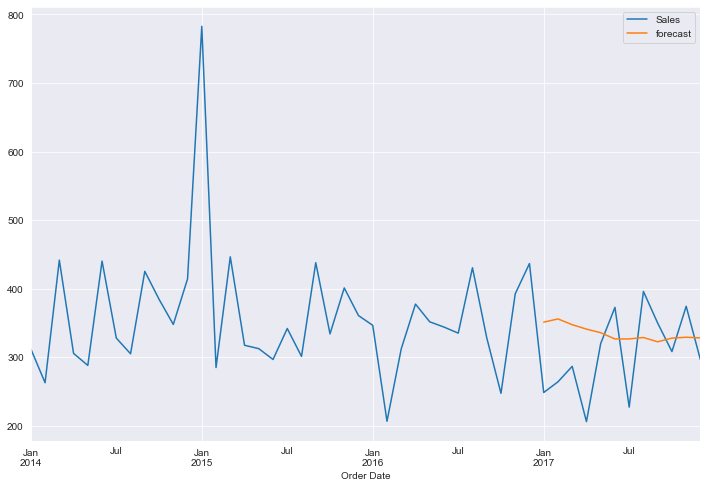

In [136]:
pred_df =furniture_df
pred_df['forecast'] = result_arima_furniture.predict(
    start=pd.to_datetime('2017-01-01'),
     dynamic=False)
pred_df[['Sales','forecast']].plot(figsize=(12,8))


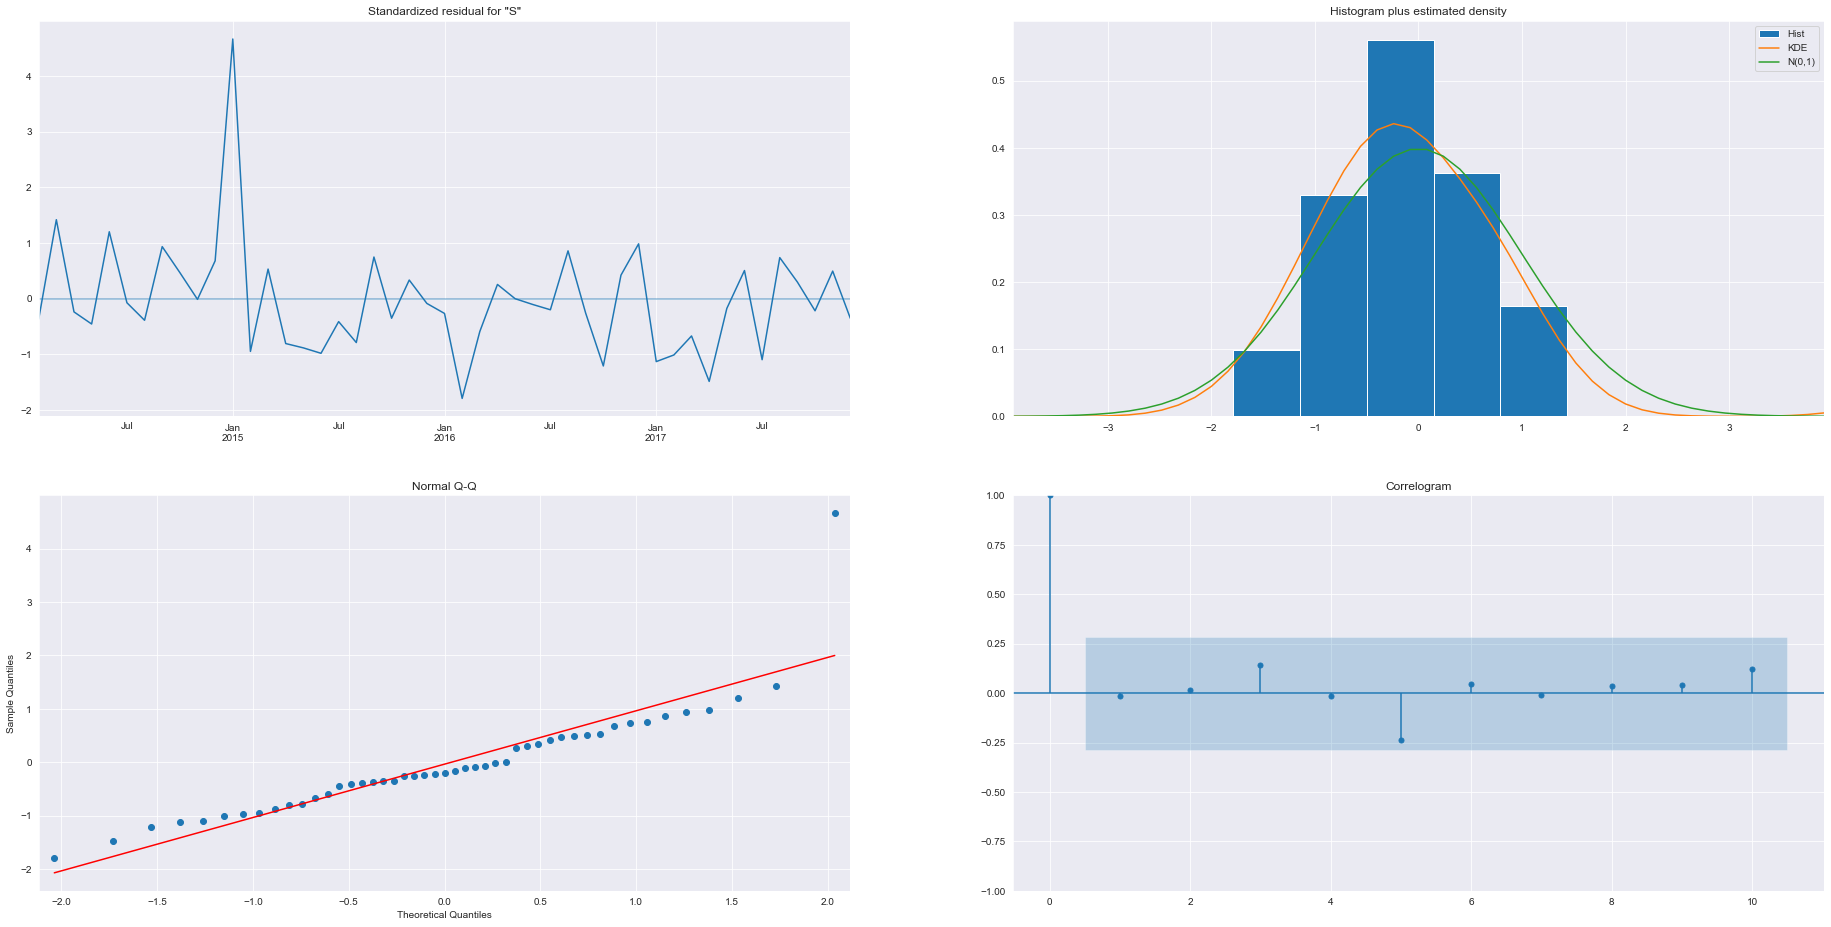

In [137]:
result_arima_furniture.plot_diagnostics(figsize=(32,16))
plt.show()

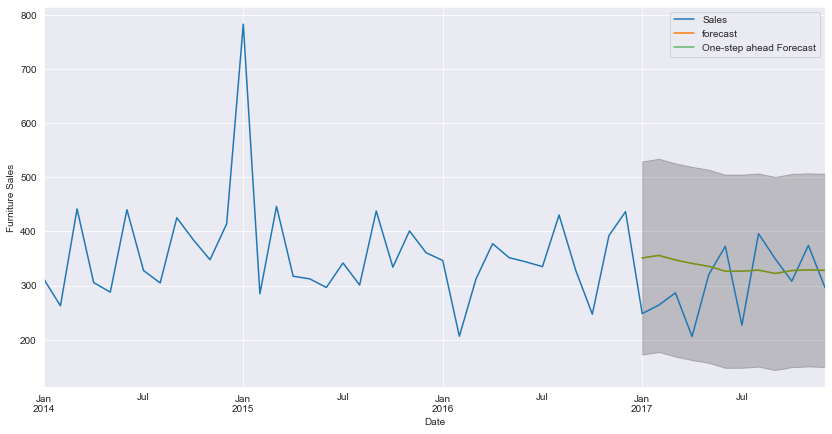

In [138]:
pred = result_arima_furniture.get_prediction(
    start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = furniture_df['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
                         alpha=.7,
                         figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

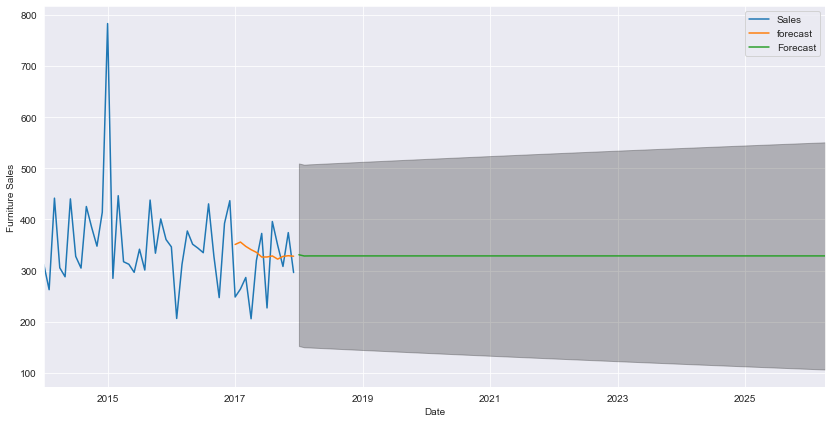

In [139]:
pred_uc = result_arima_furniture.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = furniture_df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Aproach 2 : SARIMAX

In [140]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [141]:
p = d = q = range(0, 2)
simple_pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_furniture,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)


            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1710.272761117435
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2046489859171
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.09198476282904
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1402.2219963555433
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.44645647223496
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.09198456327755
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666417
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2666.8616414268054
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364608
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.5230517047694
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.15922995503246
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2453.6716018109564
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662501865
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.5230013128138
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.638926970597
ARIMA(0, 1, 0

In [142]:
#fitting model
best_model = SARIMAX(y_furniture, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit()
print(best_model.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9982     13.522     -0.074      0.941     -27.502      25.505
ma.S.L12      -0.9855     13.786     -0.071      0.943     -28.005      26.034
sigma2      7620.1315   1.68e+05      0.045      0.964   -3.22e+05    3.37e+05


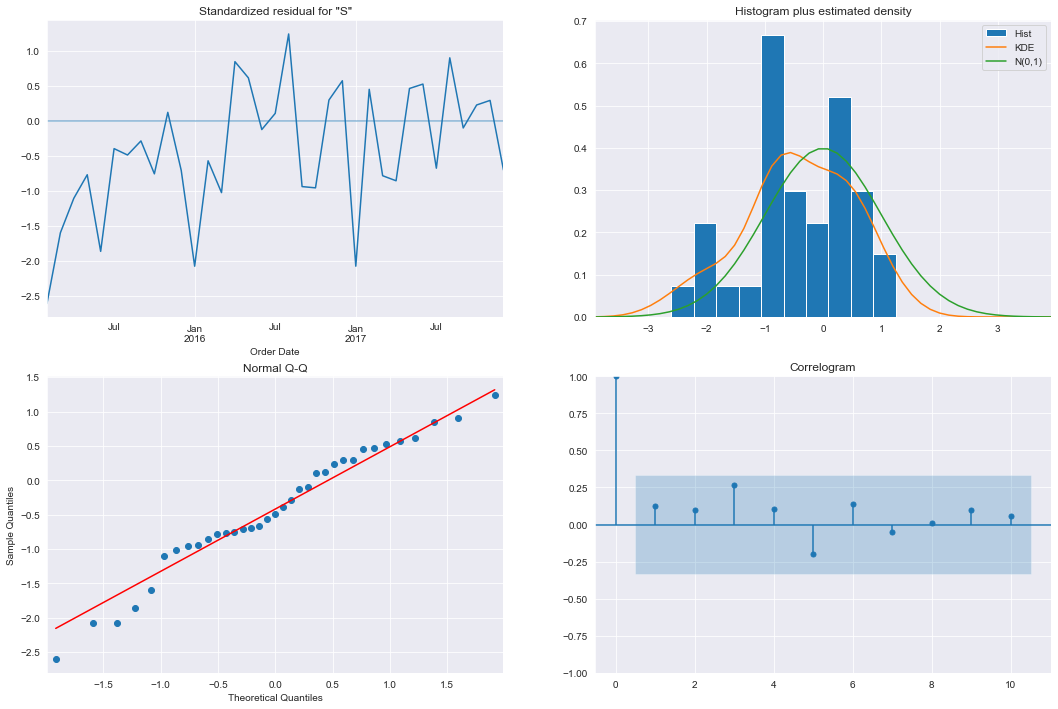

In [143]:
best_model.plot_diagnostics(figsize=(18, 12))
plt.show()

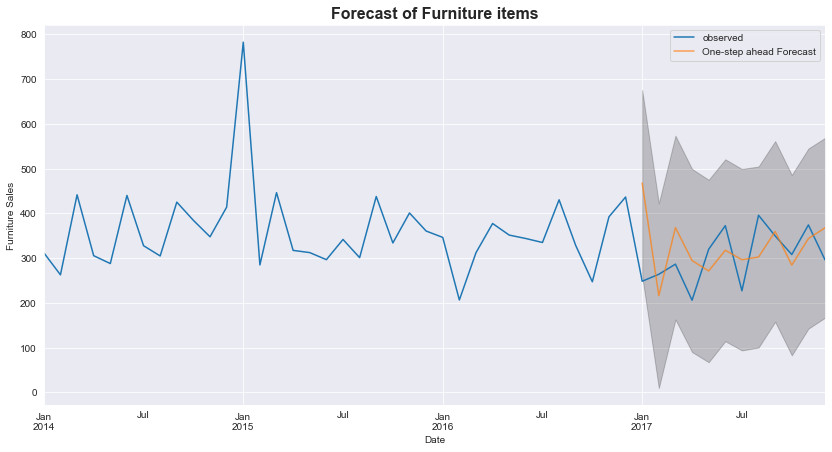

In [144]:
pred = best_model.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y_furniture['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.title('Forecast of Furniture items', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [145]:
y_forecasted = pred.predicted_mean
y_truth = y_furniture['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 7554.82
The Root Mean Squared Error of our forecasts is 86.92


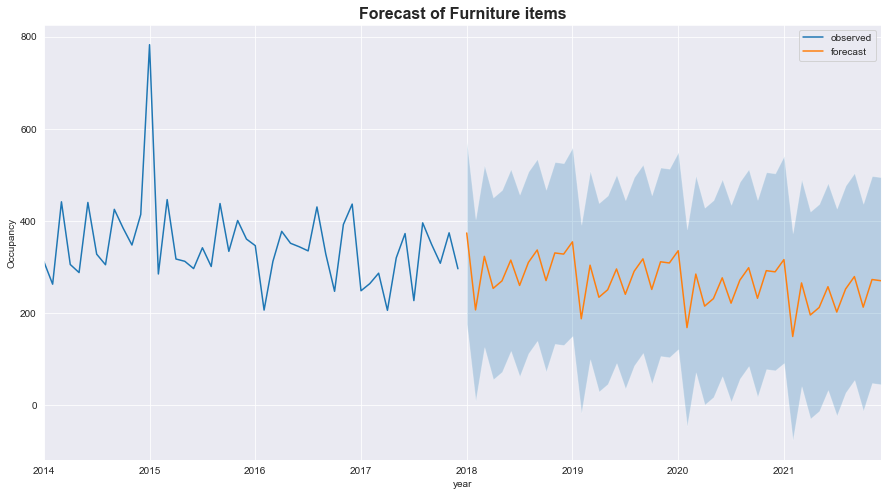

In [146]:
pred = best_model.get_forecast(steps=48)

pred_ci = pred.conf_int()

ax = y_furniture.plot(label='observed', figsize=(15, 8))

pred.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=0.25)
plt.title('Forecast of Furniture items', fontsize=16, fontweight='bold')
ax.set_xlabel('year')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

# Aproach 3 : prophet

In [147]:
from prophet import Prophet
from prophet import Prophet

prophet_furniture_model = Prophet(interval_width=0.95)

In [148]:
furniture_data.head()

,Order Date,Sales
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [149]:
furniture_data = furniture_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_data.head(2)

,ds,y
0,2014-01-01,312.126250
1,2014-02-01,262.808286


In [150]:
prophet_furniture_model.fit(furniture_data)

02:02:48 - cmdstanpy - INFO - Chain [1] start processing
02:02:48 - cmdstanpy - INFO - Chain [1] done processing


In [151]:
furniture_forecast = prophet_furniture_model.make_future_dataframe(
    periods=36, freq='MS')
furniture_forecast = prophet_furniture_model.predict(furniture_forecast)

In [152]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_furniture_model, initial='730 days',
                         period='30 days', horizon='365 days')

  0%|          | 0/12 [00:00<?, ?it/s]

02:02:50 - cmdstanpy - INFO - Chain [1] start processing
02:02:50 - cmdstanpy - INFO - Chain [1] done processing
02:02:51 - cmdstanpy - INFO - Chain [1] start processing
02:02:51 - cmdstanpy - INFO - Chain [1] done processing
02:02:53 - cmdstanpy - INFO - Chain [1] start processing
02:02:53 - cmdstanpy - INFO - Chain [1] done processing
02:02:54 - cmdstanpy - INFO - Chain [1] start processing
02:02:54 - cmdstanpy - INFO - Chain [1] done processing
02:02:55 - cmdstanpy - INFO - Chain [1] start processing
02:02:55 - cmdstanpy - INFO - Chain [1] done processing
02:02:57 - cmdstanpy - INFO - Chain [1] start processing
02:02:57 - cmdstanpy - INFO - Chain [1] done processing
02:02:58 - cmdstanpy - INFO - Chain [1] start processing
02:02:58 - cmdstanpy - INFO - Chain [1] done processing
02:03:00 - cmdstanpy - INFO - Chain [1] start processing
02:03:00 - cmdstanpy - INFO - Chain [1] done processing
02:03:01 - cmdstanpy - INFO - Chain [1] start processing
02:03:01 - cmdstanpy - INFO - Chain [1]

In [153]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-02-01,268.063709,122.130484,413.523484,206.607947,2016-01-06
1,2016-03-01,441.325547,297.207963,572.914452,312.221756,2016-01-06
2,2016-04-01,254.599629,107.736016,394.464175,377.488286,2016-01-06
3,2016-05-01,179.007394,37.491516,327.278186,351.624070,2016-01-06
4,2016-06-01,644.166630,488.829585,795.917772,343.962421,2016-01-06


In [154]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,56 days,20604.878780,143.543996,130.957044,0.404677,0.396977,0.401460,0.571429
1,57 days,25358.462681,159.243407,144.653417,0.441565,0.413945,0.419836,0.476190
2,58 days,25777.158617,160.552666,147.050626,0.440146,0.413945,0.418505,0.428571
3,59 days,24982.507168,158.058556,142.615693,0.442783,0.413945,0.412300,0.428571
4,60 days,24375.210830,156.125625,142.941423,0.433813,0.406034,0.407360,0.464286


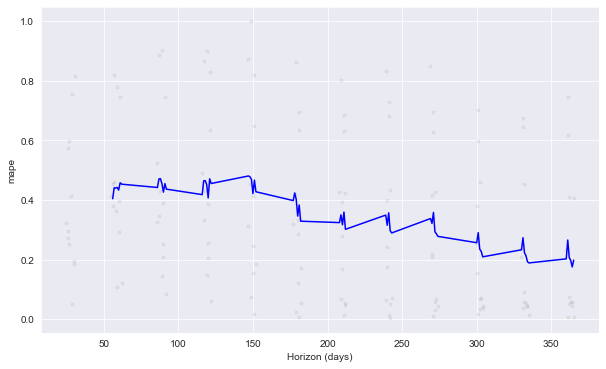

In [155]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [156]:
furniture_names = ['furniture_%s' %column for column in furniture_forecast.columns]
furniture_forecast_details = furniture_forecast.copy()

furniture_forecast_details.columns = furniture_names
furniture_forecast_details.head()

,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-01,373.337187,296.541552,554.702050,373.337187,373.337187,51.668735,51.668735,51.668735,51.668735,51.668735,51.668735,0.0,0.0,0.0,425.005922
1,2014-02-01,371.644825,172.724998,424.150082,371.644825,371.644825,-69.318624,-69.318624,-69.318624,-69.318624,-69.318624,-69.318624,0.0,0.0,0.0,302.326201
2,2014-03-01,370.116240,292.369960,544.285124,370.116240,370.116240,49.698859,49.698859,49.698859,49.698859,49.698859,49.698859,0.0,0.0,0.0,419.815100
3,2014-04-01,368.423878,196.653093,449.957911,368.423878,368.423878,-44.084393,-44.084393,-44.084393,-44.084393,-44.084393,-44.084393,0.0,0.0,0.0,324.339485
4,2014-05-01,366.786109,223.571058,460.946522,366.786109,366.786109,-24.973119,-24.973119,-24.973119,-24.973119,-24.973119,-24.973119,0.0,0.0,0.0,341.812990


In [157]:
from prophet.plot import plot_plotly, plot_components_plotly

Text(0.5, 1.0, 'Furniture Sales')

<Figure size 720x432 with 0 Axes>

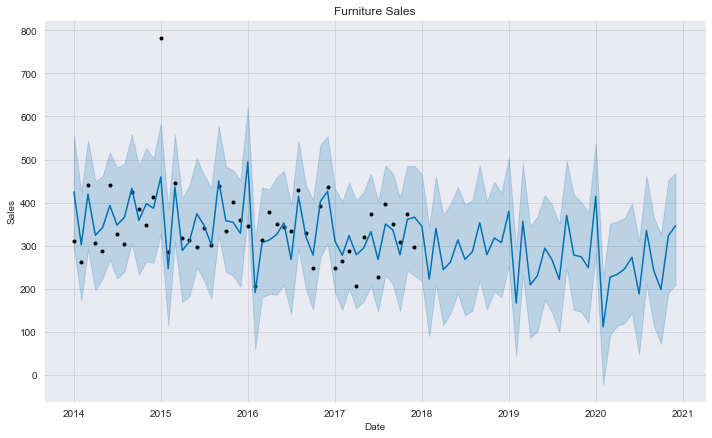

In [158]:
plt.figure(figsize=(10, 6))
prophet_furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='Sales')
plt.title('Furniture Sales')

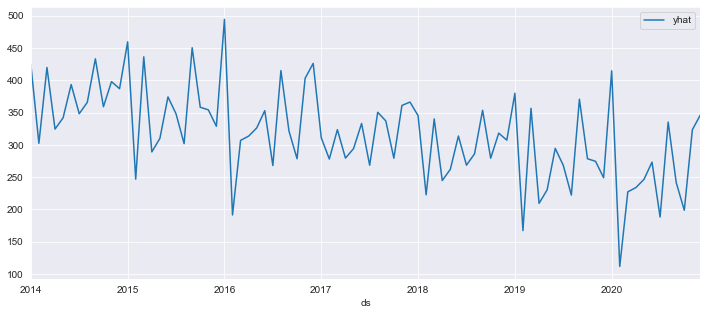

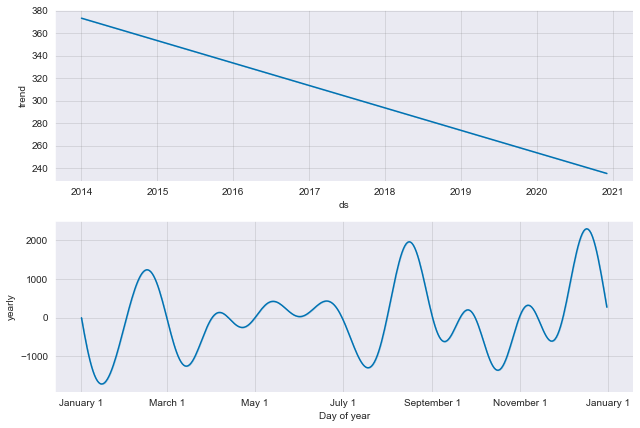

In [159]:
plot_plotly(prophet_furniture_model, furniture_forecast)
furniture_forecast.plot(x='ds',y='yhat',figsize=(12,5))

prophet_furniture_model.plot_components(furniture_forecast);

# dumping files for streamlit app

In [160]:
furniture_data.head()

,ds,y
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [161]:
office_supplies_data.head()

,Order Date,Sales
0,2014-01-01,312.126250
1,2014-02-01,262.808286
2,2014-03-01,441.635030
3,2014-04-01,305.570654
4,2014-05-01,288.032792


In [163]:
office_supplies_data = office_supplies_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_supplies_data.head(2)

,ds,y
0,2014-01-01,312.126250
1,2014-02-01,262.808286


In [162]:
technology_data.head()

,Order Date,Sales
0,2014-01-01,349.254444
1,2014-02-01,201.063750
2,2014-03-01,1477.780636
3,2014-04-01,353.670538
4,2014-05-01,355.550963


In [164]:
technology_data = technology_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_data.head(2)

,ds,y
0,2014-01-01,349.254444
1,2014-02-01,201.063750


In [167]:
import pickle

In [168]:
pickle.dump(furniture_data,open('furniture_df.pkl','wb'))
pickle.dump(office_supplies_data,open('office_df.pkl','wb'))
pickle.dump(technology_data,open('tech_df.pkl','wb'))